###  Question 1:

Filter techniques like chi-squared/ X-squared technique and mutual information technique can be applied for text classification task. Since here text representation is considered as *bag of words* which means it can be considered as a JSON object with key as word and value as no. of occurances in the document, it can be said that data here is represented in a nominal form. And techniques like chi-squared and mutual information are applicable on nominal data.

Chi-squared test in stastical testing is used to check whether the observations are independent. (Source: wikipedia)

In feature selection , X-squared filter tests whether occurance of a word and occurance of a class are dependent or independent. If occurance of features and class is independent , it will be rejected otherwise, features will be selected for text classification. (Source:[link](http://ethen8181.github.io/machine-learning/text_classification/chisquare.html))

Whereas, Mutual Information filter considers the dependency between features by measuring how much if we know one feature will reduce the uncertainity of knowing other feature.(Source:[link](https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b))

Other techniques like T-test or ANOVA filter are applicable for numerical data.

###  Question 2:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
from sklearn.datasets import fetch_20newsgroups

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
newsgroup_df = pd.DataFrame(data=newsgroups_train.data,columns=['Text'])
newsgroup_df['Target'] = pd.Series(newsgroups_train.target)
# newsgroup_df.head(5)

(100, 4874)
(4874,)


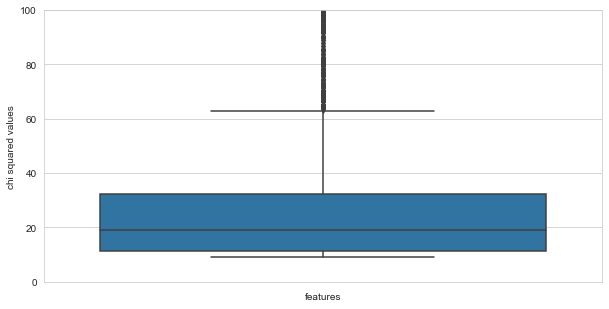

In [35]:
sample = newsgroup_df.sample(100)
count_vector = CountVectorizer(tokenizer=tokenizer.tokenize,analyzer='word',ngram_range=(1,1)
                               ,stop_words=stop_words)
words = count_vector.fit_transform(sample['Text'])
print(words.shape)
chi_squared = chi2(words,sample['Target'])
chi_values = pd.Series(chi_squared[0])
print(chi_values.shape)
plt.figure(figsize=(10,5))
ax = sns.boxplot(y=chi_squared[0])
ax.set(xlabel='features', ylabel='chi squared values')
ax.set_ylim([0,100])
plt.show()


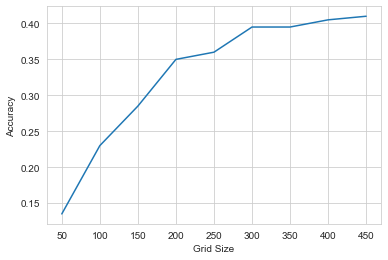

In [28]:
#  max_df will ignore terms appearing in more than 80% of the documents max_df=0.8
sample = newsgroup_df.sample(1000)
count_vector = CountVectorizer(tokenizer=tokenizer.tokenize,analyzer='word',ngram_range=(1,1)
                               ,stop_words=stop_words)
words = count_vector.fit_transform(sample['Text'])
chi_squared = chi2(words,sample['Target'])
chi_values = pd.Series(chi_squared[0])
chi_values = chi_values.sort_values(ascending=False)
grid_size = [50,100,150,200,250,300,350,400,450]
accuracy_value = []
for grid in grid_size:
    features_selection = chi_values[:grid]
    X_train,X_test,y_train,y_test = train_test_split(words[:,features_selection.index].toarray(),sample['Target'],test_size=0.2,random_state=0)
#     nb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True)
    nb = MultinomialNB(alpha=1.0)
    nb.fit(X_train,y_train)
    y_pred = nb.predict(X_test)
#     print(accuracy_score(y_test,y_pred))
    accuracy_value.append(accuracy_score(y_test,y_pred))
plt.plot(grid_size,accuracy_value)
plt.xlabel('Grid Size')
plt.ylabel('Accuracy')
plt.show()



Maximum accuracy reached is around 45%

I have implemented Chi-squared filter here. Index 1 gives p-value. Performance measure reported is Accuracy. I have used Multinomial NaiveBayes classifier and calculated it for grid size [50,100,150,200,250,300,350,400,450] and plotted test accuracy with respect to grid.

###  Question 3:

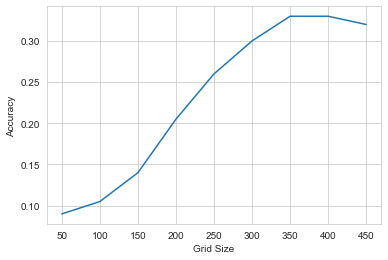

In [29]:
#  For Gaussian Naive Bayes
sample = newsgroup_df.sample(1000)
count_vector = CountVectorizer(tokenizer=tokenizer.tokenize,analyzer='word',ngram_range=(1,1)
                               ,stop_words=stop_words)
words = count_vector.fit_transform(sample['Text'])
chi_squared = chi2(words,sample['Target'])
chi_values = pd.Series(chi_squared[0])
chi_values = chi_values.sort_values(ascending=False)
grid_size = [50,100,150,200,250,300,350,400,450]
accuracy_value = []
for grid in grid_size:
    features_selection = chi_values[:grid]
    X_train,X_test,y_train,y_test = train_test_split(words[:,features_selection.index].toarray(),sample['Target'],test_size=0.2,random_state=0)
    nb = GaussianNB()
    nb.fit(X_train,y_train)
    y_pred = nb.predict(X_test)
#     print(accuracy_score(y_test,y_pred))
    accuracy_value.append(accuracy_score(y_test,y_pred))
plt.plot(grid_size,accuracy_value)
plt.xlabel('Grid Size')
plt.ylabel('Accuracy')
plt.show()

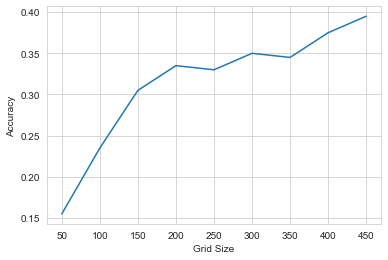

In [31]:
#  For Logistic Regression
from sklearn.linear_model import LogisticRegression
sample = newsgroup_df.sample(1000)
count_vector = CountVectorizer(tokenizer=tokenizer.tokenize,analyzer='word',ngram_range=(1,1)
                               ,stop_words=stop_words)
words = count_vector.fit_transform(sample['Text'])
chi_squared = chi2(words,sample['Target'])
chi_values = pd.Series(chi_squared[0])
chi_values = chi_values.sort_values(ascending=False)
grid_size = [50,100,150,200,250,300,350,400,450]
accuracy_value = []
for grid in grid_size:
    features_selection = chi_values[:grid]
    X_train,X_test,y_train,y_test = train_test_split(words[:,features_selection.index].toarray(),sample['Target'],test_size=0.2,random_state=0)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    y_pred = LR.predict(X_test)
#     print(accuracy_score(y_test,y_pred))
    accuracy_value.append(accuracy_score(y_test,y_pred))
plt.plot(grid_size,accuracy_value)
plt.xlabel('Grid Size')
plt.ylabel('Accuracy')
plt.show()

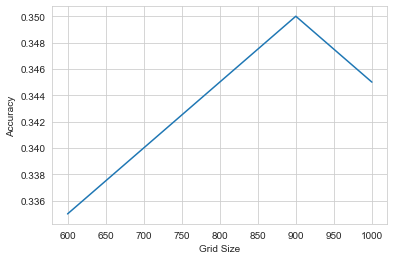

In [32]:
#  For Non Linear SVM
from sklearn.svm import NuSVC
sample = newsgroup_df.sample(1000)
count_vector = CountVectorizer(tokenizer=tokenizer.tokenize,analyzer='word',ngram_range=(1,1)
                               ,stop_words=stop_words)
words = count_vector.fit_transform(sample['Text'])
chi_squared = chi2(words,sample['Target'])
chi_values = pd.Series(chi_squared[0])
chi_values = chi_values.sort_values(ascending=False)
grid_size = [600,900,1000]
accuracy_value = []
for grid in grid_size:
    features_selection = chi_values[:grid]
    X_train,X_test,y_train,y_test = train_test_split(words[:,features_selection.index].toarray(),sample['Target'],test_size=0.2,random_state=0)
    SVM = NuSVC()
    SVM.fit(X_train,y_train)
    y_pred = SVM.predict(X_test)
#     print(accuracy_score(y_test,y_pred))
    accuracy_value.append(accuracy_score(y_test,y_pred))
plt.plot(grid_size,accuracy_value)
plt.xlabel('Grid Size')
plt.ylabel('Accuracy')
plt.show()

### Question 4 :

The boosting algorithms, are iterative and helps in improving the results by reducing errors.They are designed to reduce bias and they basically convert weak learner to strong learner.(Source: Wikipedia)

Examples of Boosting algorithms are:

AdaBoost (Adaptive Boosting)

Gradient Tree Boosting

XGBoost

In [5]:
# With feature selection 
from sklearn.ensemble import GradientBoostingClassifier
sample = newsgroup_df.sample(10000)
count_vector = CountVectorizer(tokenizer=tokenizer.tokenize,analyzer='word',ngram_range=(1,1)
                               ,stop_words=stop_words)
words = count_vector.fit_transform(sample['Text'])
chi_squared = chi2(words,sample['Target'])
chi_values = pd.Series(chi_squared[0])
chi_values = chi_values.sort_values(ascending=False)
features_selection = chi_values[:3000]
X_train,X_test,y_train,y_test = train_test_split(words[:,features_selection.index].toarray(),sample['Target'],test_size=0.2,random_state=0)
learningRate_list = [0.05, 0.10, 0.15, 0.25,0.5]
for learning_rate in learningRate_list:
    gb = GradientBoostingClassifier(n_estimators=30, learning_rate=learning_rate, max_features=250, max_depth=2, random_state=0)
    gb.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    y_pred = gb.predict(X_test)
    print("Accuracy score (test): {0:.3f}".format(accuracy_score(y_test,y_pred)))
    

Learning rate:  0.05
Accuracy score (training): 0.628
Accuracy score (test): 0.580
Learning rate:  0.1
Accuracy score (training): 0.652
Accuracy score (test): 0.590
Learning rate:  0.15
Accuracy score (training): 0.671
Accuracy score (test): 0.601
Learning rate:  0.25
Accuracy score (training): 0.706
Accuracy score (test): 0.609
Learning rate:  0.5
Accuracy score (training): 0.720
Accuracy score (test): 0.595


In [36]:
# Without feature selection , with bag of words
from sklearn.ensemble import GradientBoostingClassifier
sample = newsgroup_df.sample(5000)
count_vector = CountVectorizer(tokenizer=tokenizer.tokenize,analyzer='word',ngram_range=(1,1)
                               ,stop_words=stop_words)
words = count_vector.fit_transform(sample['Text'])
learningRate_list = [0.05, 0.10, 0.15, 0.25,0.5]
X_train,X_test,y_train,y_test = train_test_split(words,sample['Target'],test_size=0.2,random_state=0)
for learning_rate in learningRate_list:
    gb = GradientBoostingClassifier(n_estimators=30, learning_rate=learning_rate, max_features=250, max_depth=2, random_state=0)
    gb.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    y_pred = gb.predict(X_test)
    print("Accuracy score (test): {0:.3f}".format(accuracy_score(y_test,y_pred)))

Learning rate:  0.05
Accuracy score (training): 0.560
Accuracy score (test): 0.398
Learning rate:  0.1
Accuracy score (training): 0.577
Accuracy score (test): 0.391
Learning rate:  0.15
Accuracy score (training): 0.593
Accuracy score (test): 0.372
Learning rate:  0.25
Accuracy score (training): 0.603
Accuracy score (test): 0.355
Learning rate:  0.5
Accuracy score (training): 0.609
Accuracy score (test): 0.334


Using features after implementing Chi-squared filter is comparitively giving better accuracy on test set as compared to without implementing filtering methods.

Accuracy for training data is around 70% while accuracy is only 50-60% for test data, This could be because model is overfitted.If this will be implemented on large sample size accuracy will be better.

In [227]:
# from sklearn.feature_selection import mutual_info_classif
# mutual = mutual_info_classif(words,y_train)
# mutual = pd.Series(mutual)
# mutual_test = pd.Series(mutual_test)
# print(mutual)
# # print(words)
# fig = plt.figure(figsize=(10,3))
# # mutual[:50].plot.bar()